For this problem, use the population dataset, and perform the following: 
EDA on the time series to find trends and seasonality. Forecast the population on the given dataset for the next 6 months.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
dataset=pd.read_csv("popdata.csv",parse_dates=["date"],index_col="date")
dataset

,value
date,
1952-01-01,127299.000
1952-02-01,127517.000
1952-03-01,127721.000
1952-04-01,127933.000
1952-05-01,128130.000
...,...
2019-08-01,300581.333
2019-09-01,300775.872
2019-10-01,300972.035


In [87]:
dataset.index.freq="MS"

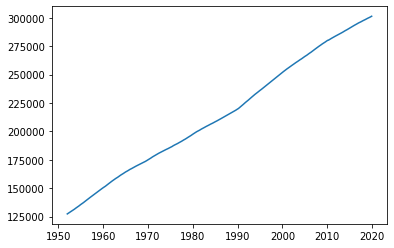

In [88]:
plt.plot(dataset) # The series is Not stationary

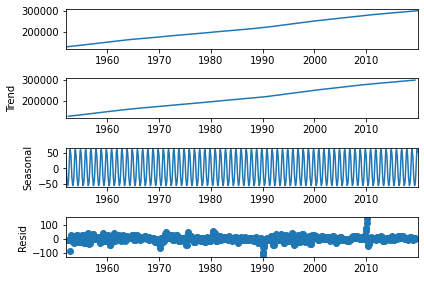

In [89]:
# Decomposing the series

from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(dataset,model="additive")  # since the seasonal component is not changing
result.plot();

In [6]:
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error

In [7]:
adftest = adfuller(dataset.values)

In [8]:
adftest #p-value is 0.85 which is greater than 0.05. 
#We reject the null hypothesis (Ho:The data is stationary). The series is not stationary

(-0.6653174109472848,
 0.8555297779110316,
 17,
 798,
 {'1%': -3.4385711275998583,
  '5%': -2.8651686574447375,
  '10%': -2.568702230639255},
 6593.486797606457)

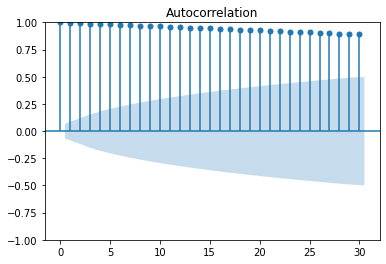

In [9]:
plot_acf(dataset); # the sample ACF shows a gradual decrease

C:\Users\gargi\Anaconda3\envs\tf\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


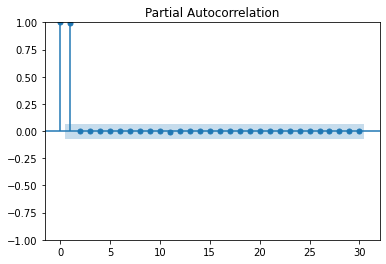

In [10]:
plot_pacf(dataset); # sample pacf almost becomes 0 after 2 significant lags. Probably an AR 2 model

In [131]:
dataset["difference"]=dataset.diff()

<AxesSubplot:xlabel='date'>

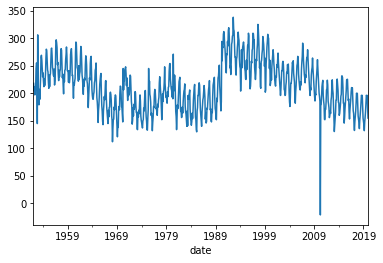

In [110]:
dataset["difference"].plot()

In [132]:
dataset["diff2"]=dataset.difference.diff()

In [133]:
dataset

,value,difference,diff2
date,,,
1952-01-01,127299.000,NaN,NaN
1952-02-01,127517.000,218.000,NaN
1952-03-01,127721.000,204.000,-14.000
1952-04-01,127933.000,212.000,8.000
1952-05-01,128130.000,197.000,-15.000
...,...,...,...
2019-08-01,300581.333,196.340,15.336
2019-09-01,300775.872,194.539,-1.801
2019-10-01,300972.035,196.163,1.624


<AxesSubplot:xlabel='date'>

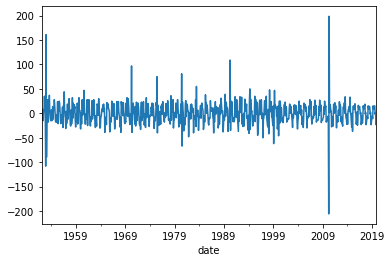

In [113]:
dataset.diff2.plot() # We were able make the series stationary afte differencing twice

In [134]:
dataset=dataset.diff2.dropna()

In [135]:
dataset

date
1952-03-01   -14.000
1952-04-01     8.000
1952-05-01   -15.000
1952-06-01     6.000
1952-07-01     7.000
               ...  
2019-08-01    15.336
2019-09-01    -1.801
2019-10-01     1.624
2019-11-01   -23.249
2019-12-01   -17.917
Name: diff2, Length: 814, dtype: float64

In [136]:
adfuller(dataset)

(-7.221127817898095,
 2.110012187584659e-10,
 21,
 792,
 {'1%': -3.438633612472885,
  '5%': -2.865196199232788,
  '10%': -2.5687169024206713},
 6560.129833849591)

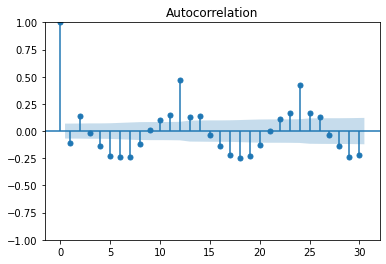

In [138]:
plot_acf(dataset);

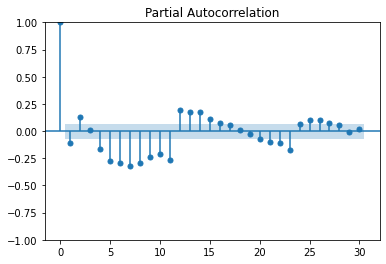

In [139]:
plot_pacf(dataset);

In [141]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore") 

In [145]:
dataset=pd.read_csv("popdata.csv",parse_dates=["date"],index_col="date")
dataset

,value
date,
1952-01-01,127299.000
1952-02-01,127517.000
1952-03-01,127721.000
1952-04-01,127933.000
1952-05-01,128130.000
...,...
2019-08-01,300581.333
2019-09-01,300775.872
2019-10-01,300972.035


In [146]:
stepwise_fit=auto_arima(dataset.values,start_p=1,start_q=1,max_p=3,max_q=3,m=12,seasonal=False,error_action="ignore",suppress_warnings=True,
                       stepwise=True)

In [147]:
stepwise_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  816
Model:               SARIMAX(2, 2, 0)   Log Likelihood               -3682.649
Date:                Tue, 10 May 2022   AIC                           7371.298
Time:                        21:37:08   BIC                           7385.404
Sample:                             0   HQIC                          7376.712
                                - 816                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0910      0.014     -6.651      0.000      -0.118      -0.064
ar.L2          0.1238      0.030      4.167      0.000       0.066       0.182
sigma2       497.2611      9.570     51.960      0.000     478.504     516.018
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             10228.46
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.20
Prob(H) (two-sided):                  0.35   Kurtosis:                        20.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [148]:
train=dataset.iloc[:-12]
test=dataset.iloc[-12:] # one year for testing

In [149]:
from statsmodels.tsa.arima.model import ARIMA

In [150]:
model=ARIMA(dataset.values,order=(2,2,0))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  816
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -3682.649
Date:                Tue, 10 May 2022   AIC                           7371.298
Time:                        21:37:22   BIC                           7385.404
Sample:                             0   HQIC                          7376.712
                                - 816                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0910      0.014     -6.651      0.000      -0.118      -0.064
ar.L2          0.1238      0.030      4.167      0.000       0.066       0.182
sigma2       497.2611      9.570     51.960      0.000     478.504     516.018
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             10228.46
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.20
Prob(H) (two-sided):                  0.35   Kurtosis:                        20.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [151]:
predictions=results.predict(len(train),len(dataset)-1)

In [152]:
index=pd.date_range(start="2019-01-01",end="2019-12-01",freq="MS")

In [153]:
index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [154]:
pred=pd.DataFrame(predictions)

In [155]:
pred

,0
0,299462.611191
1,299605.095688
2,299743.475459
3,299865.182890
4,300024.923163
5,300195.403338
6,300370.981106
7,300565.880838
8,300778.051437
9,300972.472975


In [159]:
pred.index=index

In [160]:
pred=pred.rename(columns={0:"pred"})

In [161]:
pred

,pred
2019-01-01,299462.611191
2019-02-01,299605.095688
2019-03-01,299743.475459
2019-04-01,299865.182890
2019-05-01,300024.923163
2019-06-01,300195.403338
2019-07-01,300370.981106
2019-08-01,300565.880838
2019-09-01,300778.051437
2019-10-01,300972.472975


In [162]:
pd.concat([test,pred],axis=1)

,value,pred
2019-01-01,299457.812,299462.611191
2019-02-01,299600.744,299605.095688
2019-03-01,299732.843,299743.475459
2019-04-01,299880.250,299865.182890
2019-05-01,300037.319,300024.923163
2019-06-01,300203.989,300195.403338
2019-07-01,300384.993,300370.981106
2019-08-01,300581.333,300565.880838
2019-09-01,300775.872,300778.051437
2019-10-01,300972.035,300972.472975


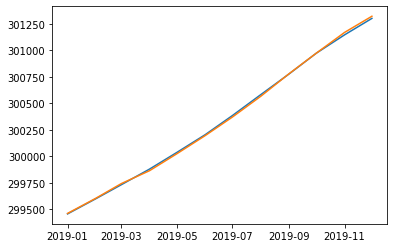

In [163]:
plt.plot(test)
plt.plot(pred)

In [164]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,pred)
error

165.18932522280303

In [165]:
# retain the model on the full dataset and predict the future
model=ARIMA(dataset,order=(2,2,0))
results=model.fit()

In [166]:
forecast=results.predict(len(dataset),len(dataset)+5)

In [167]:
forecast

2020-01-01    301453.696067
2020-02-01    301605.342090
2020-03-01    301757.025261
2020-04-01    301908.444641
2020-05-01    302059.892625
2020-06-01    302211.305357
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='date'>

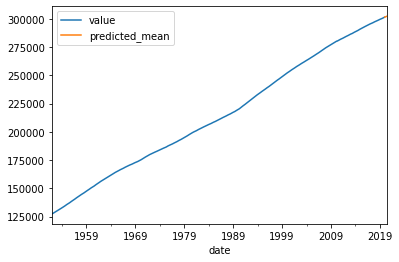

In [168]:
dataset.plot(legend=True)
forecast.plot(legend=True)